In [42]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA

In [43]:
df = pd.read_csv("HR_Process_Dataset.csv")

In [44]:
df['WorkLifeBalanceScaled'] = df['WorkLifeBalance'].map({
    1: 0.00,  # Very Poor
    2: 0.25,  # Poor
    3: 0.50,  # Average
    4: 0.75,  # Good
    5: 1.00   # Excellent
})

In [45]:
features = df[['HourlnWeek', 'HomeToWork', 'Involvement', 'JobSatisfaction', 'WorkLifeBalanceScaled']]

In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [ ]:
# Fit a Gaussian Mixture Model with 2 clusters to the standardized feature set
# This assigns each employee to one of two probabilistic clusters (e.g., Intervention vs Balanced)
gmm = GaussianMixture(n_components=2, random_state=42)
df['Cluster'] = gmm.fit_predict(X_scaled)

In [48]:
cluster_map = {
    0: 'Intervention Needed',
    1: 'Balanced & Productive'
}
df['WorkLifeSegment'] = df['Cluster'].map(cluster_map)

In [49]:
cluster_means = df.groupby('Cluster')[features.columns].mean()
print("\nCluster Profiles:\n", cluster_means)


Cluster Profiles:
          HourlnWeek  HomeToWork  Involvement  JobSatisfaction  \
Cluster                                                         
0         59.279174   19.509213     2.882189         3.214964   
1         57.379463    6.508705     3.408675         3.107111   

         WorkLifeBalanceScaled  
Cluster                         
0                     0.523451  
1                     0.492476  


In [ ]:
# Apply Principal Component Analysis (PCA) to reduce the 5D feature space to 2D
# This is used purely for visualizing the clustering result in a 2D scatter plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [51]:
# Attach PCA components for plotting
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

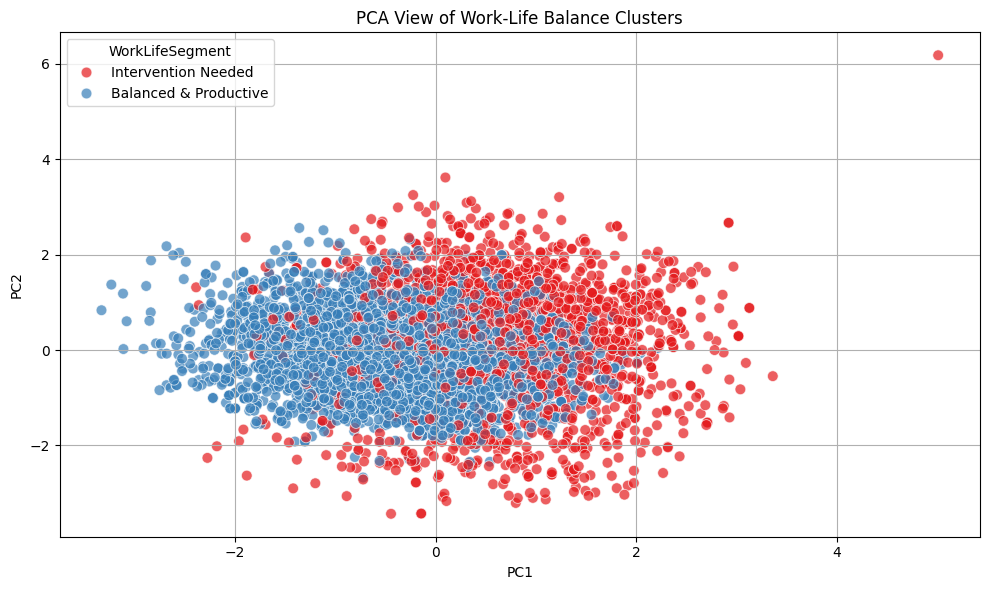

In [52]:
# Plot PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='WorkLifeSegment', palette='Set1', alpha=0.7, s=60)
plt.title('PCA View of Work-Life Balance Clusters')
plt.grid(True)
plt.tight_layout()
plt.show()